***Exercise 2, Questions A,B,D***



In the beginning are asked to implement and train a convolutional neural
network so that it recognises handwritten digits. Again we are using the MNIST handwritten digit data set. 

***Global Imports***

In [ ]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Reshape, Conv2DTranspose, LeakyReLU, GaussianNoise
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import os
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.manifold import SpectralEmbedding
from keras import backend as K
from keras.utils.vis_utils import plot_model

from tensorflow.keras.datasets import mnist

***Dataset load and preprocessing***

In [ ]:
# Load the MNIST data set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)


#normalize the image data to the interval [0, 1]. This is done by dividing by 255.
x_train = x_train / 255.0
x_test = x_test / 255.0


#create one-hot vectors for each label in the data set
label_set = np.sort(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, len(label_set))
y_test = keras.utils.to_categorical(y_test, len(label_set))


x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)


(60000, 28, 28)
(10000, 28, 28)


***Architecture, compilation and fitting of our model***


We construct a convolutional neural network with:


-> 2 convolutional layers with filters=32, and the Leaky ReLU as activation function. We also add a MaxPooling and a dropout layer, and we flatten the output.

-> a fully connected layer with 128 nodes and the Leaky ReLU as an activation function.

-> a fully connected layer as the output layer of our model, with 10 nodes and the softmax as an activation function.

We compile using the Adam optimizer (with a learning rate of 0.0002), and the categorical crossentropy loss function.

We train the model for 5 epochs, until we get a satisfying accuracy of 0.9867.

In [ ]:
modeld = Sequential()
modeld.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = LeakyReLU(alpha=0.2)))
modeld.add(Conv2D(32, (3, 3), activation = LeakyReLU(alpha=0.2)))
modeld.add(MaxPooling2D(pool_size = (2, 2)))
modeld.add(Dropout(0.2))
modeld.add(Flatten())
modeld.add(Dense(128, activation = LeakyReLU(alpha=0.2)))
modeld.add(Dropout(0.2))
modeld.add(Dense(10, activation = "softmax"))
modeld.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002), metrics = ["accuracy"])
modeld.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                        

2022-03-10 21:00:35.652835: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-10 21:00:35.657822: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-10 21:00:35.657973: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-10 21:00:35.658487: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/5


2022-03-10 21:00:37.401364: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


  1/938 [..............................] - ETA: 29:09 - loss: 2.3043 - accuracy: 0.1094

2022-03-10 21:00:38.242759: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


938/938 [==============================] - 4s 3ms/step - loss: 0.3319 - accuracy: 0.9049 - val_loss: 0.1088 - val_accuracy: 0.9691
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1079 - accuracy: 0.9680 - val_loss: 0.0672 - val_accuracy: 0.9787
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0726 - accuracy: 0.9779 - val_loss: 0.0453 - val_accuracy: 0.9841
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0573 - accuracy: 0.9823 - val_loss: 0.0438 - val_accuracy: 0.9856
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0471 - accuracy: 0.9847 - val_loss: 0.0375 - val_accuracy: 0.9865


2022-03-10 21:00:50.309284: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: mnist_model.saved_model/assets


INFO:tensorflow:Assets written to: mnist_model.saved_model/assets


Training Accuracy: 0.9847
Validation Accuracy: 0.9865


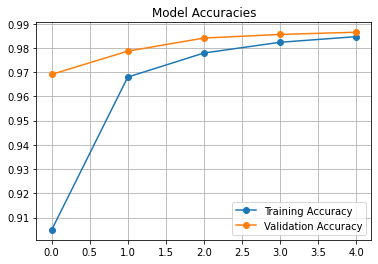

In [ ]:
modeld_path = "mnist_model.saved_model"
modeld_history_path = "mnist_model.saved_model_history"


modeld.fit(x_train, y_train,
           batch_size = 64,
           epochs = 5,
           verbose = 1,
           validation_data = (x_test, y_test))


history = modeld.history.history
modeld.save(modeld_path)
pickle.dump(history, open(modeld_history_path, "wb"))

print(f"Training Accuracy: {history['accuracy'][-1]:.4}")
print(f"Validation Accuracy: {history['val_accuracy'][-1]:.4}")


plt.figure()
plt.title("Model Accuracies")
plt.plot(history["accuracy"], marker = "o", label = "Training Accuracy")
plt.plot(history["val_accuracy"], marker = "o", label = "Validation Accuracy")
plt.legend()
plt.grid()


***Architecture and compilation of the generator model***

We now want to construct an image generator that creates adversarial examples for our modeld, which of course are going to be based on the MNIST dataset.

Adversarial examples are inputs to a neural network that result in an incorrect output from the network.


More specifically we want each time given the input '1', our generator to output an image that despite looking very similar to the ones of our dataset to the human eye, it will trick our modeld to classify it to any other class, except from its 'true' one, that being the class a human would assign to it.

We will choose five digits, and for each one, we want modelg to generate 9 fake MNIST-samples in such a way, that modeld will assign to each one of those 9 images of the same digit, a different 'wrong' class.


This generator will basically be a neural network that has only one input neuron, and as an output, it returns arrays of size 28x28. We construct this network with:

->  a fully connected layer with 28 nodes and the Leaky ReLU as an activation function.


-> 2 transpose convolutional layers with filters = 512 and 1024 respectively and the Leaky ReLU as activation function. 

-> a fully connected layer as the output layer of our model, with 784 nodes and the sigmoid asactivation function.

We compile using the Adam optimizer (with a learning rate of 0.0002), and the categorical crossentropy loss function.

In [ ]:
modelg=Sequential()
modelg.add(Dense(1 * 7 * 7, input_shape = (1,), activation = LeakyReLU(alpha=0.2)))
modelg.add(Reshape((7, 7, 1)))
modelg.add(Conv2DTranspose(512, (4,4), strides=(2,2), padding='same', activation = LeakyReLU(alpha=0.2)))
modelg.add(Conv2DTranspose(1024, (4,4), strides=(2,2), padding='same', activation = LeakyReLU(alpha=0.2)))
modelg.add(Dense(1, activation='sigmoid'))
modelg.add(Reshape((28, 28, 1)))

modelg.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002), metrics = ["accuracy"])
modelg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 49)                98        
                                                                 
 reshape (Reshape)           (None, 7, 7, 1)           0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 512)      8704      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1024)     8389632   
 ranspose)                                                       
                                                                 
 dense_3 (Dense)             (None, 28, 28, 1)         1025      
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)        

***Architecture, compilation and fitting of the composite model***

In order to create such a model that generates adversarial examples for modeld, we actually need modeld to be somehow 'present' during its training. 

For this reason, we 'bind' modeld and modelg together, creating a composite model, modelgan, which is the one we are going to implement the training on. Of course during this training process, we only want the weights of modelg being updated, so we declare modeld as non trainable.

In [ ]:
# define the combined generator and discriminator model, for updating the generator
#make weights in the discriminator not trainable
modeld.trainable = False
# connect them
modelgan = Sequential()
modelgan.add(modelg)
modelgan.add(modeld)

# compile model
modelgan.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002), metrics = ["accuracy"])
modelgan.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 28, 28, 1)         8399459   
                                                                 
 sequential (Sequential)     (None, 10)                600810    
                                                                 
Total params: 9,000,269
Trainable params: 8,399,459
Non-trainable params: 600,810
_________________________________________________________________


We choose 5 samples from the MNIST dataset, each corresponding to a different digit. We also make sure that modeld correctly classifies all five of them: 

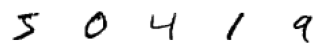

5
0
4
1
9


In [ ]:
for i in range(5):
	# define subplot
	plt.subplot(5, 5, 1 + i)
	# turn off axis
	plt.axis('off')
	# plot raw pixel data
	plt.imshow(x_train[i].reshape(28, 28,), cmap='gray_r')
plt.show()


for i in range(5):
  print(np.argmax(modeld.predict(x_train[i].reshape((1,28,28,1)))))


chosen = np.array([5,0,4,1,9])

We train modelgan doing the following:
for each sample i we picked, and for each class j that is different than this of the corresponding samples, we repeat for as many times as needed:


-> train modelg with target equal to sample i. 


-> train modelgan with target equal the one-hot encoding of label j.

In [ ]:
adv = []

for i in range(5): 
  for j in range(10):
    if j != chosen[i]:
      for k in range(300):
        modelg.train_on_batch([np.array([1])],x_train[i].reshape((1,28,28,1)))
        modelgan.train_on_batch([np.array([1])], keras.utils.to_categorical(j, len(label_set)).reshape(1,10))
      adv.append(modelg.predict([np.array([1])]))



Below we present the pictures we get from modelg, together with the label that modeld assigned to each one of them. 

As we can observe, most of the images generated by modelg look like real samples from the MNIST dataset, and it wouldn't be difficult for a human to correctly classify them. 

However, for most of them, our modeld, which previously scored an accuracy of 0.9867, not only fails to correctly predict their 'true' labels, but it also assigns different 'wrong' classes to pictures which to the human eye, are very similar one to each other. And that was exactly what we were aiming for when training modelg.

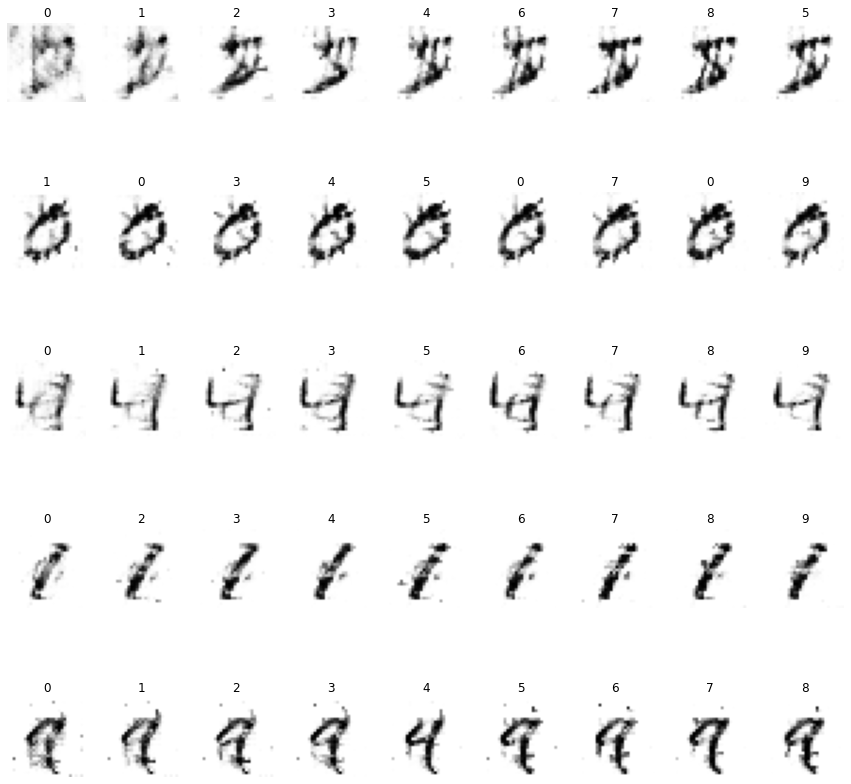

In [ ]:
plt.figure(figsize=(15,15))
for i in range(len(adv)):
  plt.subplot(5, 10 - 1, i+1)
  plt.axis('off')
  plt.imshow(adv[i].reshape((28,28)), cmap='gray_r')
  plt.title(np.argmax(modeld.predict(adv[i])))

plt.show()



An important observation for adversarial examples is that they generally are not model or architecture specific. Adversarial examples generated for one neural network architecture will transfer very well to other architectures as well. 
This basically means that the adversarial examples we generated based on modeld with the intention of tricking it, will most probably trick other models as well.

So generally, it is possible to create adversarial examples for a completely black box model where we have no prior knowledge of its internal mechanics. 


Moreover, it is worth mentioning that we can create adversarial examples for just about any neural network, even state-of-the-art models that have so-called “superhuman” abilities. So there is no model that is completely immune to adversarial examples providing they are properly generated.

***Architecture, compilation and fitting of a model that is robust to the adversarial examples we generated***


Now we will try to construct a new model, modelt that is able to correctly classify the adversarial examples we've generated above.

We know that modeld scores an accuracy of approx 98% on the MNIST dataset, which makes it a strong enough model.
The adversarial examples we generated were specifically made to trick modeld in particular, but they would most probably trick a different, equally strong or even stronger model as well. 
So we need to do something more than just creating a stonger model, that being one that scores an even better accuracy on the MNIST dataset.

What we did previously was to create fake samples of the MNIST dataset, with an amount of carefully constructred noise so that they cause modeld to misclassify them, while at the same time they look real to a human. 
So this added noise was what our modeld 'wasn't expecting to deal with', considering it had been trained and evaluated only on 'true' samples of the MNIST dataset.  '

So our approach is to train modelt on samples that somehow contain noise. A quick way to do that is to add a gaussian 'layer' to each layer of our model.This can be done in Keras using the GausianNoise layer which applies additive zero-centered Gaussian noise, and is a natural choice as corruption process for real valued inputs.

We are going to use the same model on both the MNIST and the CIFAR10 datasets so we construct modelt based on the 'heavier' modeld we used as a discriminator for CIFAR10 dataset.



So we construct modelt with:


-> 2 convolutional layers with filters = 32, and the ReLU as activation function. We also add MaxPooling, BatchNormalization, dropout and GaussianNoise layers.

-> 2 convolutional layers with filters = 64 and the ReLU as activation function. We also add MaxPooling, BatchNormalization, dropout and GaussianNoise layers.

-> 2 convolutional layers with filters = 128 and the ReLU as activation function. We also add MaxPooling, BatchNormalization, dropout and GaussianNoise layers.

-> a fully connected layer with 128 nodes and the ReLU as an activation function. We also add MaxPooling, BatchNormalization, dropout and GaussianNoise layers.

-> a fully connected layer with 64 nodes and the ReLU as an activation function. We also add MaxPooling, BatchNormalization, dropout and GaussianNoise layers.

-> a fully connected layer as the output layer of our model, with 10 nodes and the softmax as an activation function.

We compile using the Adam optimizer (with a learning rate of 0.0001), and the categorical crossentropy loss function.

We train modelt for 25 epochs on the MNIST dataset, and we get an accuracy of 0.9948.



In [ ]:
modelt = Sequential()
modelt.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
modelt.add(BatchNormalization())
modelt.add(GaussianNoise(0.4))

modelt.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelt.add(BatchNormalization())
modelt.add(MaxPooling2D((2, 2)))
modelt.add(Dropout(0.2))
modelt.add(GaussianNoise(0.4))

modelt.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelt.add(BatchNormalization())
modelt.add(GaussianNoise(0.4))

modelt.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelt.add(BatchNormalization())
modelt.add(MaxPooling2D((2, 2)))
modelt.add(Dropout(0.3))
modelt.add(GaussianNoise(0.4))

modelt.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelt.add(BatchNormalization())
modelt.add(GaussianNoise(0.4))

modelt.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelt.add(BatchNormalization())
modelt.add(MaxPooling2D((2, 2)))
modelt.add(Dropout(0.4))
modelt.add(GaussianNoise(0.4))
modelt.add(Flatten())

modelt.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelt.add(BatchNormalization())
modelt.add(Dropout(0.5))
modelt.add(GaussianNoise(0.4))

modelt.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
modelt.add(BatchNormalization())
modelt.add(Dropout(0.5))
modelt.add(GaussianNoise(0.4))
modelt.add(Dense(10, activation='softmax'))

modelt.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
modelt.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_17 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 gaussian_noise_16 (Gaussian  (None, 28, 28, 32)       0         
 Noise)                                                          
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_18 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                      

Epoch 1/25
938/938 [==============================] - 7s 6ms/step - loss: 2.2915 - accuracy: 0.3214 - val_loss: 1.1976 - val_accuracy: 0.6248
Epoch 2/25
938/938 [==============================] - 5s 6ms/step - loss: 0.9838 - accuracy: 0.6661 - val_loss: 0.4576 - val_accuracy: 0.8616
Epoch 3/25
938/938 [==============================] - 5s 6ms/step - loss: 0.5923 - accuracy: 0.8130 - val_loss: 0.2182 - val_accuracy: 0.9365
Epoch 4/25
938/938 [==============================] - 5s 6ms/step - loss: 0.4103 - accuracy: 0.8787 - val_loss: 0.1327 - val_accuracy: 0.9607
Epoch 5/25
938/938 [==============================] - 5s 6ms/step - loss: 0.2963 - accuracy: 0.9147 - val_loss: 0.0943 - val_accuracy: 0.9712
Epoch 6/25
938/938 [==============================] - 5s 6ms/step - loss: 0.2276 - accuracy: 0.9362 - val_loss: 0.0689 - val_accuracy: 0.9790
Epoch 7/25
938/938 [==============================] - 6s 6ms/step - loss: 0.1858 - accuracy: 0.9494 - val_loss: 0.0518 - val_accuracy: 0.9851
Epoch 

INFO:tensorflow:Assets written to: modelt.saved_model/assets


Training Accuracy: 0.9886
Validation Accuracy: 0.9948


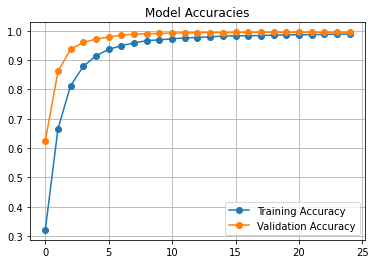

In [ ]:
modelt_path = "modelt.saved_model"
modelt_history_path = "modelt.saved_model_history"


modelt.fit(x_train, y_train,
           batch_size = 64,
           epochs = 25,
           verbose = 1,
           validation_data = (x_test, y_test))


history = modelt.history.history
modelt.save(modelt_path)
pickle.dump(history, open(modelt_history_path, "wb"))

print(f"Training Accuracy: {history['accuracy'][-1]:.4}")
print(f"Validation Accuracy: {history['val_accuracy'][-1]:.4}")


plt.figure()
plt.title("Model Accuracies")
plt.plot(history["accuracy"], marker = "o", label = "Training Accuracy")
plt.plot(history["val_accuracy"], marker = "o", label = "Validation Accuracy")
plt.legend()
plt.grid()

We then feed the adversarial examples we generated using modelg, to modelt, and get predictions for their class.

From the graph below, we observe that modelt manages to successfully recognize all generated images of digits 0, 4 and some of digit 1.

However, as for the images it doesn't manages to recognise, it seems that among those adversarial examples only a part of them manages to trick it the way they were supposed to, as for many of them modelts' predictions are wrong, but not the 'wrong one' they were supposed to be. 

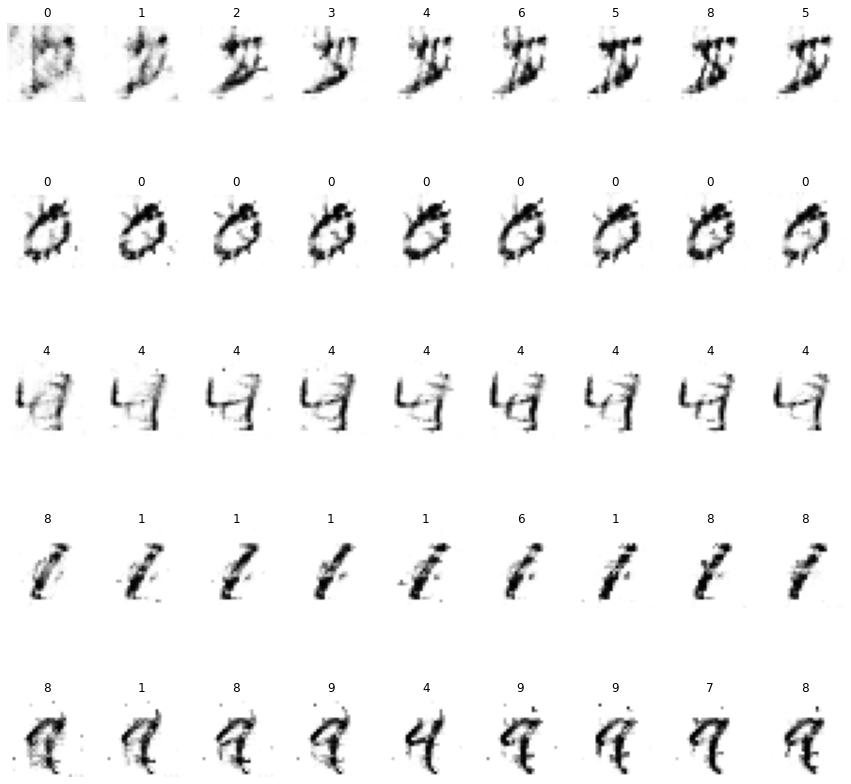

In [ ]:
plt.figure(figsize=(15,15))
for i in range(len(adv)):
  plt.subplot(5, 10 - 1, i+1)
  plt.axis('off')
  plt.imshow(adv[i].reshape((28,28)), cmap='gray_r')
  plt.title(np.argmax(modelt.predict(adv[i])))

plt.show()

***References:***

https://ml.berkeley.edu/blog/posts/adversarial-examples/


https://machinelearningmastery.com/how-to-develop-a-conditional-generative-adversarial-network-from-scratch/


https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/


https://jis-eurasipjournals.springeropen.com/articles/10.1186/s13635-021-00125-2?fbclid=IwAR21tXAiSIY7tU72N3aDVudcy7qdiyj7tALCrSvkx3eBIKjsOTWfb6c0X0A
